In [1]:
from sklearn.tree import DecisionTreeClassifier
from itertools import product
from PIL import Image
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plot
from gdalconst import*
from osgeo import ogr
import numpy as np
from sklearn import metrics
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn import svm, datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import random
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

In [2]:
#4 creating variables for band files taken from the landscape file of 2012
#4 bands include - Elevation, Aspect, Slope, Fuel Model Number


#year 2012
band1_12 = '/home/skhatter/exp1/us_130lcp13/band1_.tif'
band2_12 = '/home/skhatter/exp1/us_130lcp13/band2_.tif'
band3_12 = '/home/skhatter/exp1/us_130lcp13/band3_.tif'
band4_12 = '/home/skhatter/exp1/us_130lcp13/band4_.tif'

#this file has cumulative fire frequencies from 1992 - 2012
fireFreq = '/home/skhatter/exp2/summation/fire92_12_.tif'


#opening all the band files using gdal
dataset1_12 = gdal.Open(band1_12, GA_ReadOnly)
dataset2_12 = gdal.Open(band2_12, GA_ReadOnly)
dataset3_12 = gdal.Open(band3_12, GA_ReadOnly)
dataset4_12 = gdal.Open(band4_12, GA_ReadOnly)
dataset_fireFreq = gdal.Open(fireFreq, GA_ReadOnly)


In [3]:
#getting individual bands for 2012
band_fireFreq = dataset_fireFreq.GetRasterBand(1)
band1_12 = dataset1_12.GetRasterBand(1)
band2_12 = dataset2_12.GetRasterBand(1)
band3_12 = dataset3_12.GetRasterBand(1)
band4_12 = dataset4_12.GetRasterBand(1)


#get data in the numpy arrays for 2012
data_fireFreq =  np.array(band_fireFreq.ReadAsArray(0,0,band_fireFreq.XSize, band_fireFreq.YSize)) 
data1_12 = np.array(band1_12.ReadAsArray(0,0,band1_12.XSize, band1_12.YSize))
data2_12 = np.array(band2_12.ReadAsArray(0,0,band2_12.XSize, band2_12.YSize))
data3_12 = np.array(band3_12.ReadAsArray(0,0,band3_12.XSize, band3_12.YSize))
data4_12 = np.array(band4_12.ReadAsArray(0,0,band4_12.XSize, band4_12.YSize))

In [4]:
#Reshaping the arrays

#data1_12 = data1_12.flatten()
data1_12 = np.reshape(data1_12, data1_12.size)
data2_12 = np.reshape(data2_12, data2_12.size)
data3_12 = np.reshape(data3_12, data3_12.size)
data4_12 = np.reshape(data4_12, data4_12.size)
data_fireFreq = np.reshape(data_fireFreq, data_fireFreq.size)

1977
0
578.0
454.386028111
206466.662542
663.60832268


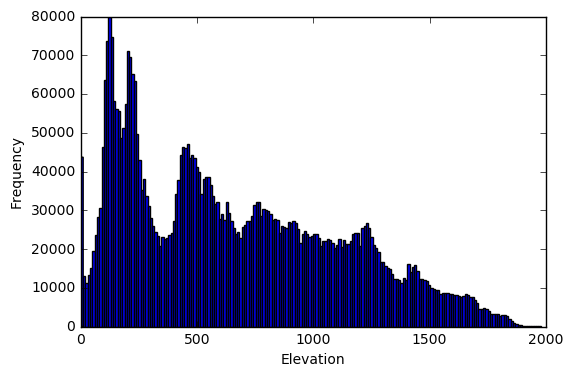

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = data1_12
plt.hist(x, bins=200)
plt.xlabel('Elevation');
plt.ylabel('Frequency');
print(np.amax(data1_12)) 
print(np.amin(data1_12))

print(np.median(data1_12))
print(np.std(data1_12))
print(np.var(data1_12))
print(np.mean(data1_12))


66
0
11.6253726602
10.0
_______
9.17525867694
84.1853717887


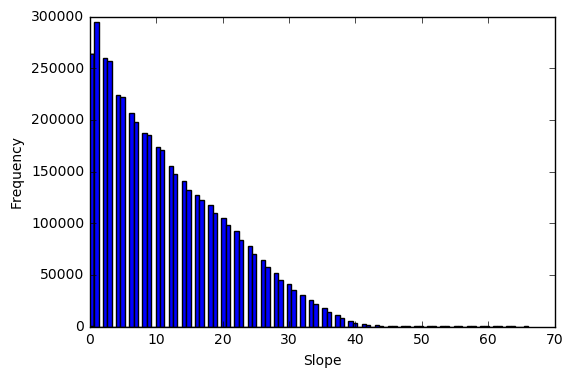

In [6]:
x = data2_12
plt.hist(x, bins=100)
plt.xlabel('Slope');
plt.ylabel('Frequency')
print(np.amax(data2_12)) 
print(np.amin(data2_12))

print(np.mean(data2_12))
print(np.median(data2_12))

print('_______')
print(np.std(data2_12))
print(np.var(data2_12))

359
0
151.595612577
150.0
_______
116.328643264
13532.3532436


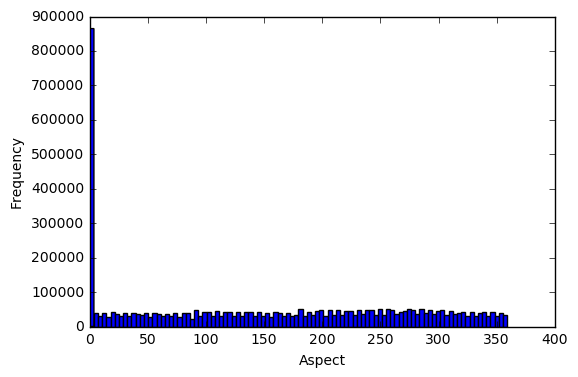

In [7]:
x = data3_12
plt.hist(x, bins=100)
plt.xlabel('Aspect');
plt.ylabel('Frequency')
print(np.amax(data3_12)) 
print(np.amin(data3_12))

print(np.mean(data3_12))
print(np.median(data3_12))

print('_______')
print(np.std(data3_12))
print(np.var(data3_12))


{0: 33830, 1: 1929917, 2: 812188, 99: 222560, 4: 236872, 5: 504067, 6: 72, 7: 22937, 8: 71606, 9: 46710, 10: 50838, 12: 6, 98: 16561, 3: 4, 91: 716471, 93: 469}


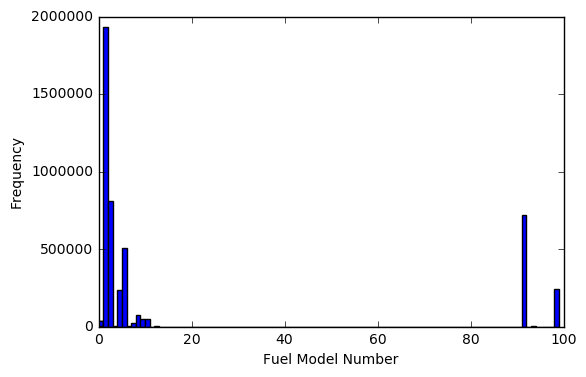

In [8]:
x = data4_12
plt.hist(x, bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,90,91,92,93,94,95,96,97,98,99])
plt.ylabel('Frequency');
plt.xlabel('Fuel Model Number')

dict1 = {}
for x in range(0,len(data4_12)):
            if(data4_12[x] in dict1):
                dict1[data4_12[x]] = dict1[data4_12[x]] + 1
            else:
                dict1[data4_12[x]] = 1
print(dict1)

{0.0: 2354362, 1.0: 1876867, 2.0: 366773, 3.0: 61241, 4.0: 5659, 5.0: 206}


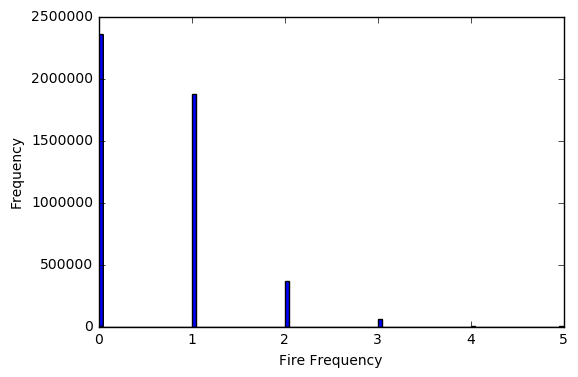

In [9]:
x = data_fireFreq
plt.hist(x, bins=100)
plt.ylabel('Frequency');
plt.xlabel('Fire Frequency')


dict1 = {}
for x in range(0,len(data_fireFreq)):
            if(data_fireFreq[x] in dict1):
                dict1[data_fireFreq[x]] = dict1[data_fireFreq[x]] + 1
            else:
                dict1[data_fireFreq[x]] = 1
print(dict1)

In [10]:
#Creating variables for Fire Parameters

#file for 2013-14 - this file has 1/0 if the fire happened in 2013-2014/ or not
fireParamFile_14 = '/home/skhatter/exp1/fire2014/fire2014_.tif'


#opening the files using gdal
fireDataset_14 = gdal.Open(fireParamFile_14, GA_ReadOnly)

#getting the raster band 1 from all the 4 datasets
fireBand1_14 = fireDataset_14.GetRasterBand(1)


#converting the rasterized values in arrays
data5_14 =  np.array(fireBand1_14.ReadAsArray(0,0,fireBand1_14.XSize, fireBand1_14.YSize))


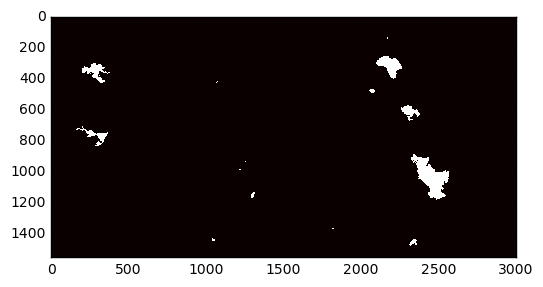

(1554, 3002)


In [11]:
#Plotting the fire band
a = np.asarray(data5_14)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

print(a.shape)

In [12]:
#reshaping the arrays
data5_14 = np.reshape(data5_14, data5_14.size)

In [13]:
#creating feature vector using complete data
#5 FEATURES-  Fire Frequency, Elevation, Slope, Aspect, Fuel Model Number
data_t = []
data_t.append(data_fireFreq)
data_t.append(data1_12)
data_t.append(data2_12)
data_t.append(data3_12)
data_t.append(data4_12)
data = np.array(data_t)
print(data.shape)
data = data.T

#feature vector is X
X = data

#target vector is y
y = data5_14

print('Original dataset Shape {}'.format(Counter(y)))

(5, 4665108)
Original dataset Shape Counter({0.0: 4596878, 1.0: 68230})


          FireFq      Elev     Slope    Aspect    FuelM.     Class
FireFq  1.000000  0.083812  0.246805  0.152234 -0.346138  0.018798
Elev    0.083812  1.000000  0.306614  0.149148 -0.359786  0.077342
Slope   0.246805  0.306614  1.000000  0.310003 -0.240521  0.071563
Aspect  0.152234  0.149148  0.310003  1.000000 -0.162514 -0.021614
FuelM. -0.346138 -0.359786 -0.240521 -0.162514  1.000000 -0.046330
Class   0.018798  0.077342  0.071563 -0.021614 -0.046330  1.000000


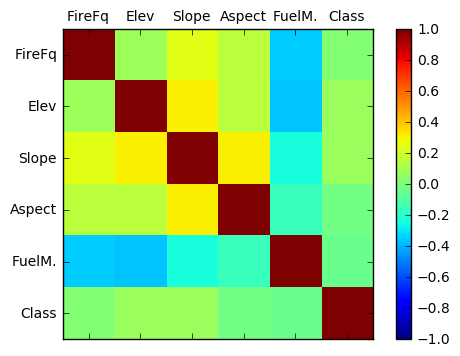

In [14]:
names = ['FireFq','Elev', 'Slope', 'Aspect','FuelM.', 'Class']
X_pd = pd.DataFrame(X, columns=names[0:5])
X_pd['Class'] = y
correlations = X_pd.corr()
print(correlations)
fig = plt.figure()

ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [15]:
X_indices = []
X_indices = list(range(y.shape[0]))
X_indices = np.asarray(X_indices)
X_train = []
X_test = []
X_test_map = np.zeros(shape=(a.shape[0], a.shape[1]))


X_indices_train, X_indices_test, y_train, y_test = train_test_split(X_indices, y, test_size = 0.2, stratify = y)

for i in range(len(X_indices_train)):
    X_train.append(data[X_indices_train[i]])


X_train = np.asarray(X_train)

counter = 0
    
for i in range(len(X_indices_test)):
    r = X_indices_test[i]//a.shape[1]
    c = X_indices_test[i] - r*a.shape[1]
    X_test.append(data[X_indices_test[i]])
    if y_test[i] == 1:
        X_test_map[r][c] = 1
      

    
X_test = np.asarray(X_test)
print(X_train.shape)

(3732086, 5)


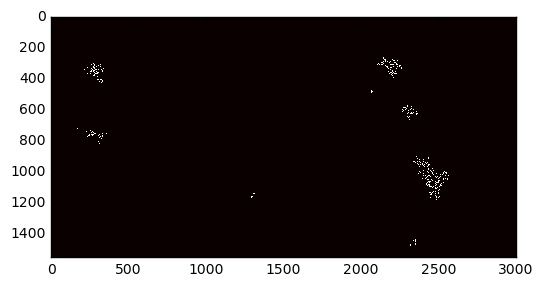

(1554, 3002)


In [16]:
test_map = np.asarray(X_test_map)
plt.imshow(test_map, cmap='hot', interpolation='nearest')
plt.show()

print(test_map.shape)

In [17]:
print(X_test.shape)

print('Training Set Shape {}'.format(Counter(y_train)))
print('Test Set Shape {}'.format(Counter(y_test)))

(933022, 5)
Training Set Shape Counter({0.0: 3677502, 1.0: 54584})
Test Set Shape Counter({0.0: 919376, 1.0: 13646})


In [18]:
#Solving Class Imbalance problem using- Random Under Sampler

#fitting the valdation set on Random Under Sampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_sample(X_train, y_train)

print('Shape of the Random Under Sampled training set {}'.format(Counter(y_rus)))


#Fitting the Random Under Sampler'd  training set to classifier
classifier_original = DecisionTreeClassifier(random_state=42)
classifier_original = classifier_original.fit(X_rus, y_rus)

y_predict_test = classifier_original.predict(X_test)

Shape of the Random Under Sampled training set Counter({0.0: 54584, 1.0: 54584})


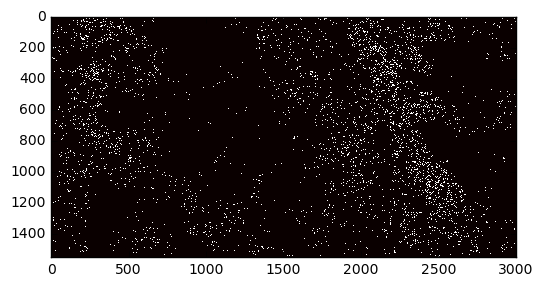

In [19]:
#Plotting the predicted test data
X_test_predict_map = np.zeros(shape=(a.shape[0], a.shape[1]))

counter = 0
    
for i in range(len(X_indices_test)):
    r = X_indices_test[i]//a.shape[1]
    c = X_indices_test[i] - r*a.shape[1]
    if y_predict_test[i] == 1:
        X_test_predict_map[r][c] = 1
      

    
X_test_predict_map = np.asarray(X_test_predict_map)

plt.imshow(X_test_predict_map, cmap='hot', interpolation='nearest')
plt.show()

Confusion matrix, without normalization
[[781768 137608]
 [  1889  11757]]
Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.14  0.86]]


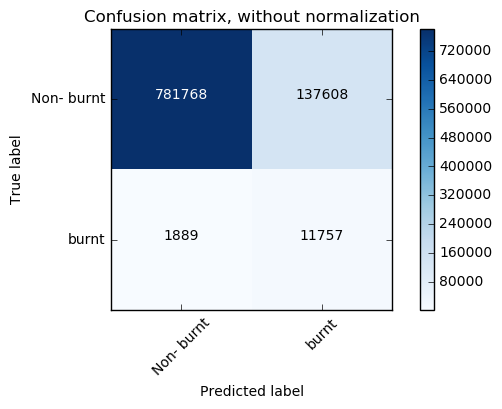

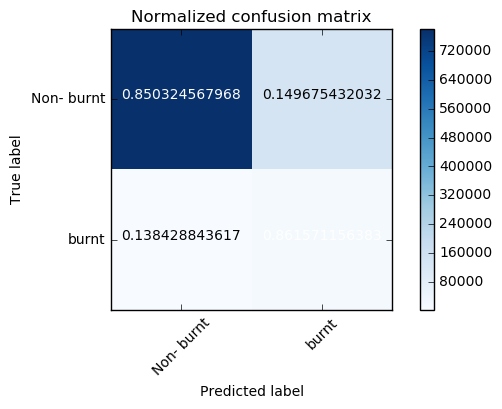

In [20]:
#Confusion matrix 
#C is such that C_{i, j} is equal to the number of observations known to be in group i 
#but predicted to be in group j.
#Thus in binary classification, the count of true negatives is C_{0,0}, 
#false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

class_names = ['Non- burnt', 'burnt']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

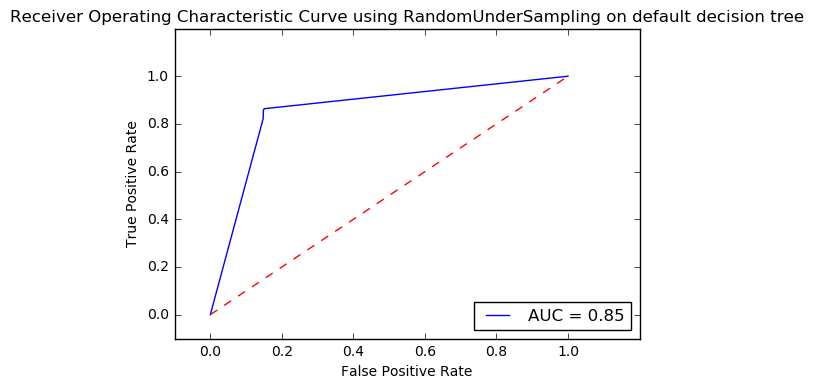

In [21]:
from sklearn.metrics import roc_curve, auc

#finding prediction for class 1 that is class Burnt
y_pred_prob = classifier_original.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)


plt.title('Receiver Operating Characteristic Curve using RandomUnderSampling on default decision tree')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [22]:
#Tuning the classifier using Grid Search CV
from sklearn.model_selection import GridSearchCV
from time import time

param_grid = {"max_features": [1,2,3,4,5],
              "max_depth":[1, 5,10,20],
              "min_samples_split": [2, 10, 50, 100, 200, 500],
              "min_samples_leaf": [2, 10, 50, 100, 200, 500],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(classifier_original, param_grid=param_grid)
start = time()
grid_search.fit(X_rus, y_rus)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))


GridSearchCV took 339.63 seconds for 1440 candidate parameter settings.


In [23]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.869 (std: 0.001)
Parameters: {'min_samples_split': 50, 'max_depth': 20, 'criterion': 'gini', 'min_samples_leaf': 10, 'max_features': 4}

Model with rank: 2
Mean validation score: 0.869 (std: 0.002)
Parameters: {'min_samples_split': 50, 'max_depth': 20, 'criterion': 'gini', 'min_samples_leaf': 10, 'max_features': 5}

Model with rank: 3
Mean validation score: 0.868 (std: 0.001)
Parameters: {'min_samples_split': 50, 'max_depth': 20, 'criterion': 'entropy', 'min_samples_leaf': 10, 'max_features': 5}



In [25]:
#preparing a tuned classifier and fitting the random under sampled data in it
classifier_tuned = DecisionTreeClassifier(random_state=42, max_features = 4, max_depth = 20, min_samples_split= 50, min_samples_leaf = 10, criterion = "gini")


classifier_tuned = classifier_tuned.fit(X_rus, y_rus)
y_test_tuned = classifier_tuned.predict(X_test)

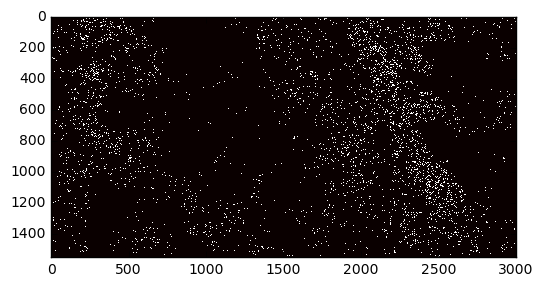

In [26]:
#Plotting the predicted test data
X_test_predict_tuned_map = np.zeros(shape=(a.shape[0], a.shape[1]))

counter = 0
    
for i in range(len(X_indices_test)):
    r = X_indices_test[i]//a.shape[1]
    c = X_indices_test[i] - r*a.shape[1]
    if y_predict_test[i] == 1:
        X_test_predict_tuned_map[r][c] = 1
      

X_test_predict_tuned_map = np.asarray(X_test_predict_map)

plt.imshow(X_test_predict_tuned_map, cmap='hot', interpolation='nearest')
plt.show()

In [27]:
#finding the data samples where predicted is not equal to actual
for i in range(1000):
    if y_test[i] != y_test_tuned[i]:
        print(X_test[i])

[  2.00e+00   1.04e+03   9.00e+00   2.53e+02   1.00e+00]
[  1.00e+00   1.73e+03   9.00e+00   1.12e+02   1.00e+00]
[   0.  320.    7.  346.    2.]
[  0.00e+00   1.48e+03   7.00e+00   1.85e+02   1.00e+00]
[  1.00e+00   1.01e+03   2.10e+01   3.54e+02   1.00e+00]
[  1.00e+00   1.58e+03   2.40e+01   8.70e+01   1.00e+00]
[  1.00e+00   1.02e+03   5.00e+00   1.77e+02   9.10e+01]
[   0.  132.   12.  192.    1.]
[    0.  1758.     5.   114.     5.]
[   1.  809.   17.  204.    1.]
[  1.00e+00   1.18e+03   3.50e+01   2.24e+02   1.00e+00]
[  1.00e+00   1.11e+03   3.20e+01   1.06e+02   1.00e+00]
[  1.00e+00   1.64e+03   1.30e+01   3.09e+02   1.00e+00]
[   1.  720.    8.   77.    2.]
[   1.  780.   13.  182.    5.]
[    0.  1751.    10.   272.     5.]
[   0.  236.   10.  102.    2.]
[  1.00e+00   1.16e+03   1.60e+01   1.80e+02   1.00e+00]
[   0.  200.    7.   76.    5.]
[    2.  1455.     9.   225.     2.]
[  1.00e+00   1.08e+03   7.00e+00   2.00e+02   1.00e+00]
[  1.00e+00   1.03e+03   2.50e+01   1.

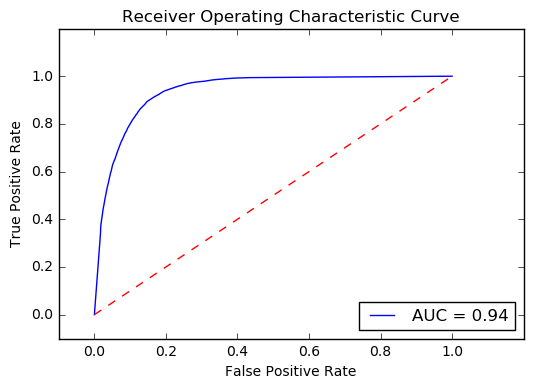

In [28]:
from sklearn.metrics import roc_curve, auc

#finding prediction for class 1 that is class Burnt
y_pred_prob = classifier_tuned.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)



plt.title('Receiver Operating Characteristic Curve')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[778581 140795]
 [  1373  12273]]
Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.1   0.9 ]]


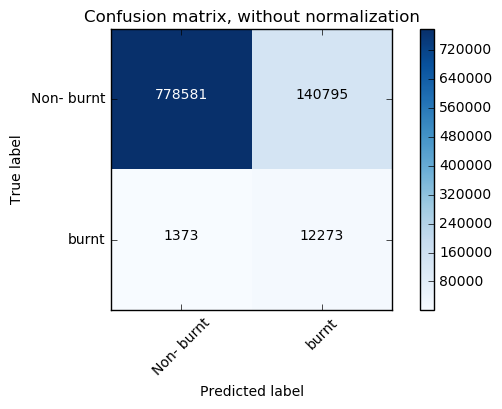

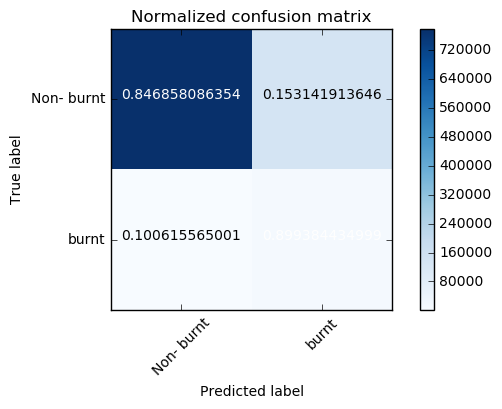

In [29]:
#Confusion matrix  on tuned classifer


#C is such that C_{i, j} is equal to the number of observations known to be in group i 
#but predicted to be in group j.
#Thus in binary classification, the count of true negatives is C_{0,0}, 
#false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

class_names = ['Non- burnt', 'burnt']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_tuned)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()